# notebooks/eda.ipynb

In [1]:
import sys
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
from data_loader import load_volatility_data

## 1. Data Loading and Inspection

In [2]:
vol_data, dates, companies = load_volatility_data(frequency='5_min')

if vol_data:
    df_rv5 = vol_data['rv']
    print(f"Time Period: {dates.min().date()} to {dates.max().date()}")
    print(f"Number of Trading Days: {len(dates)}")
    print(f"Number of Companies: {len(companies)}")
    
    print("\nData Preview (Realized Variance - RV_5):")
    display(df_rv5.head())
    
    print("\nPercentage of Missing Data per Stock (RV_5):")
    missing_percentage = df_rv5.isnull().sum() / len(df_rv5) * 100
    display(missing_percentage.sort_values(ascending=False).head())

Time Period: 2003-01-02 to 2024-03-28
Number of Trading Days: 5346
Number of Companies: 30

Data Preview (Realized Variance - RV_5):


,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
0,,,,,,,,,,,,,,,,,,,,,
2003-01-02,6.493909,5.177506,9.886836,4.448244,7.469396,3.273442,NaN,6.021531,1.096263,4.063409,...,1.865281,2.524214,2.345767,3.039955,1.803699,NaN,1.243573,NaN,2.978431,2.507809
2003-01-03,6.574494,3.225009,5.290480,3.394580,3.064001,1.358903,NaN,5.040150,1.107289,4.255362,...,0.989090,0.992439,2.270305,2.558900,1.165628,NaN,1.811149,NaN,2.180145,2.734488
2003-01-06,5.992264,2.460476,5.818162,4.693210,2.934207,2.025361,NaN,3.370531,1.279852,3.009806,...,1.001261,1.653220,1.260537,2.253860,0.992536,NaN,1.987607,NaN,6.406378,1.437287
2003-01-07,9.500654,3.384553,9.690251,4.456576,4.178979,2.282209,NaN,5.310697,1.903197,3.378270,...,1.453886,1.640643,3.484806,1.609994,0.810025,NaN,2.118707,NaN,3.931977,1.662831
2003-01-08,4.940525,2.276319,4.962692,4.570327,1.792323,3.065960,NaN,3.535851,1.725547,3.180074,...,0.567798,1.315005,2.871030,3.245061,1.358806,NaN,2.863678,NaN,5.450524,2.087943



Percentage of Missing Data per Stock (RV_5):


DOW     76.318743
V       24.523008
TRV     19.528620
CRM      6.921062
AAPL     0.000000
dtype: float64

## 2. Market-Wide Aggregation

In [3]:
market_indicators = {}
for measure, df in vol_data.items():
    market_indicators[measure] = df.mean(axis=1)
    
df_market = pd.DataFrame(market_indicators)
display(df_market.head())

,rv,bpv,good,bad,rq
0,,,,,
2003-01-02,4.272124,3.687488,2.849233,1.422891,67.545453
2003-01-03,3.416994,3.310232,1.672390,1.744604,33.643831
2003-01-06,2.774986,2.569793,1.817847,0.957139,22.107081
2003-01-07,3.643269,3.293197,1.763384,1.879885,28.719989
2003-01-08,3.000370,2.748957,1.268290,1.732080,23.429456


## 3. Descriptive Statistics

Market-Wide Indicators (Summary):


,rv,bpv,good,bad,rq
count,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000
mean,2.311261,2.138174,1.167084,1.144177,104.587925
std,4.130482,3.901646,2.222364,1.976917,1242.931879
min,0.262316,0.231026,0.121971,0.114896,0.270460
25%,1.002772,0.915842,0.502769,0.477820,3.785951
50%,1.439656,1.318984,0.718645,0.702817,8.222411
75%,2.249097,2.055657,1.114289,1.137602,21.638644
max,120.140414,112.379184,73.047050,47.093364,63721.879023


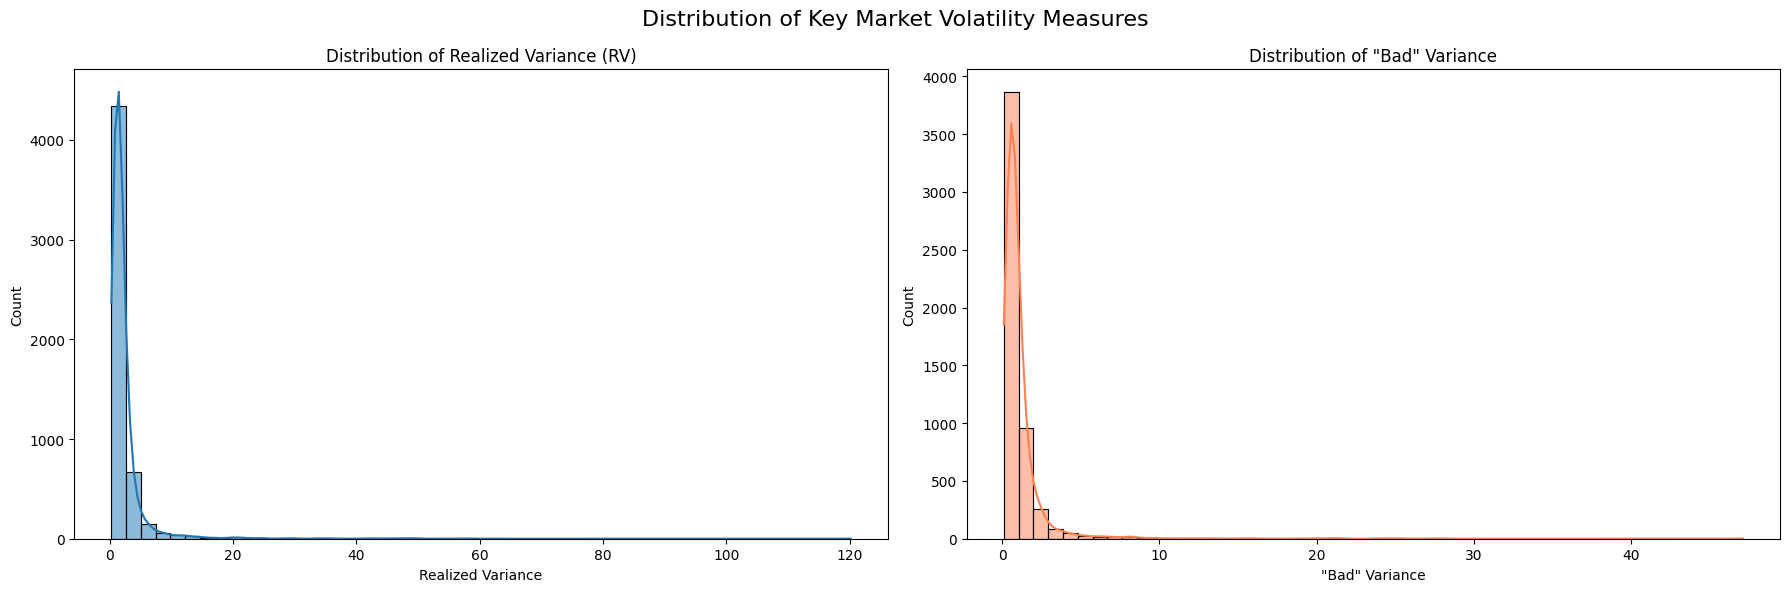

In [4]:
print('Market-Wide Indicators (Summary):')
display(df_market.describe())

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Distribution of Key Market Volatility Measures', fontsize=16)

sns.histplot(df_market['rv'], kde=True, ax=ax[0], bins=50)
ax[0].set_title('Distribution of Realized Variance (RV)')
ax[0].set_xlabel('Realized Variance')

sns.histplot(df_market['bad'], kde=True, ax=ax[1], color='coral', bins=50)
ax[1].set_title('Distribution of "Bad" Variance')
ax[1].set_xlabel('"Bad" Variance')

plt.tight_layout()
plt.show()

## 4. Correlation Analysis

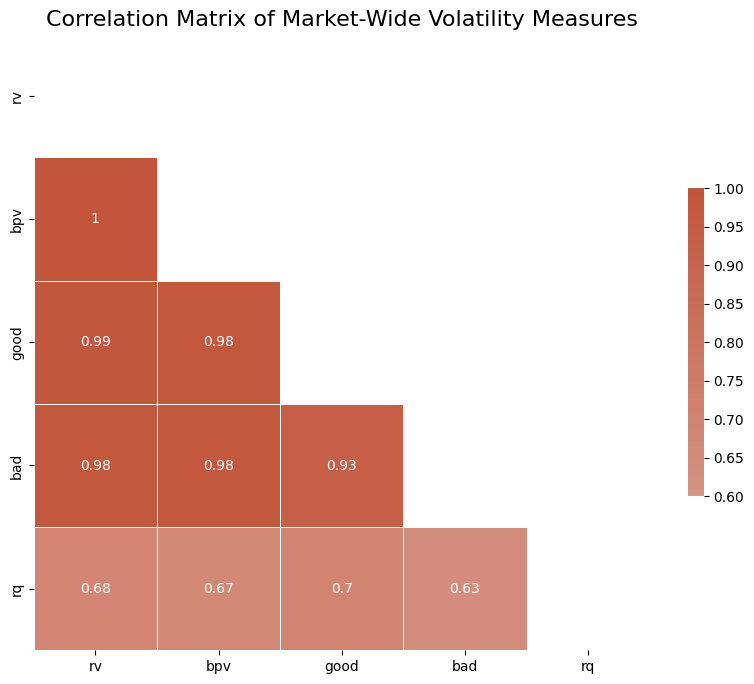

In [11]:
corr_matrix = df_market.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmin=0.6,
    vmax=1.0,
    center=0,
    square=True,
    annot=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5},
)

plt.title('Correlation Matrix of Market-Wide Volatility Measures', fontsize=16)
plt.show()

## 5. Time Series Analysis

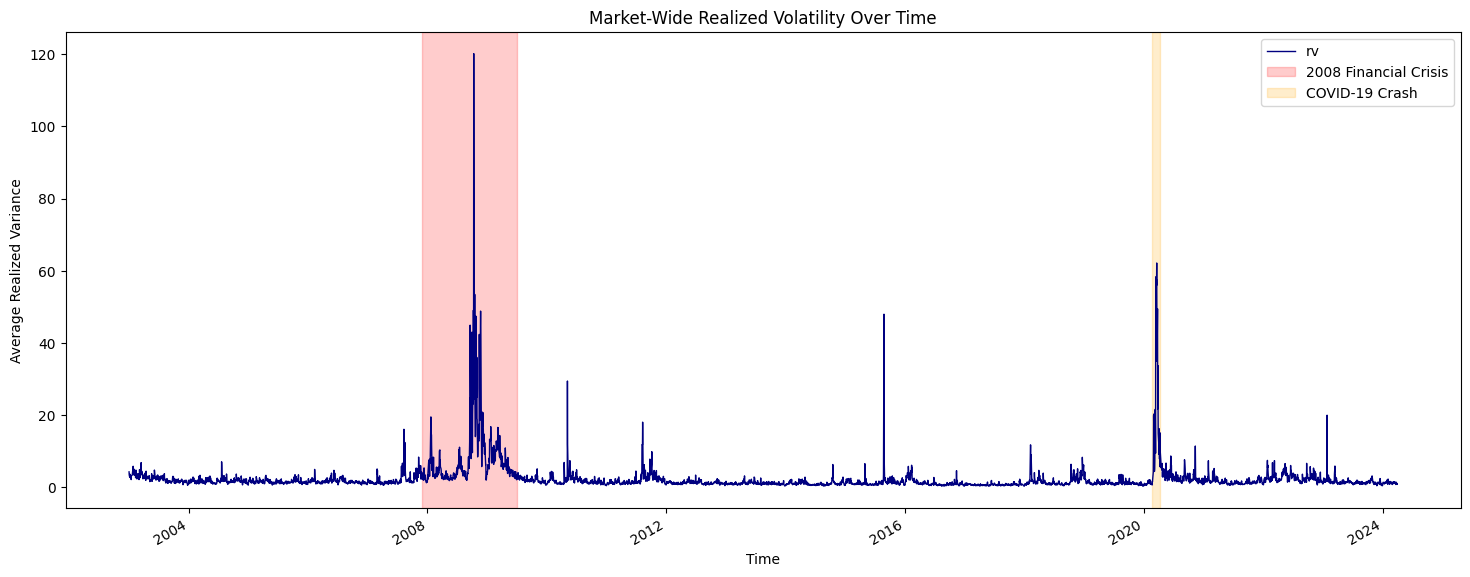

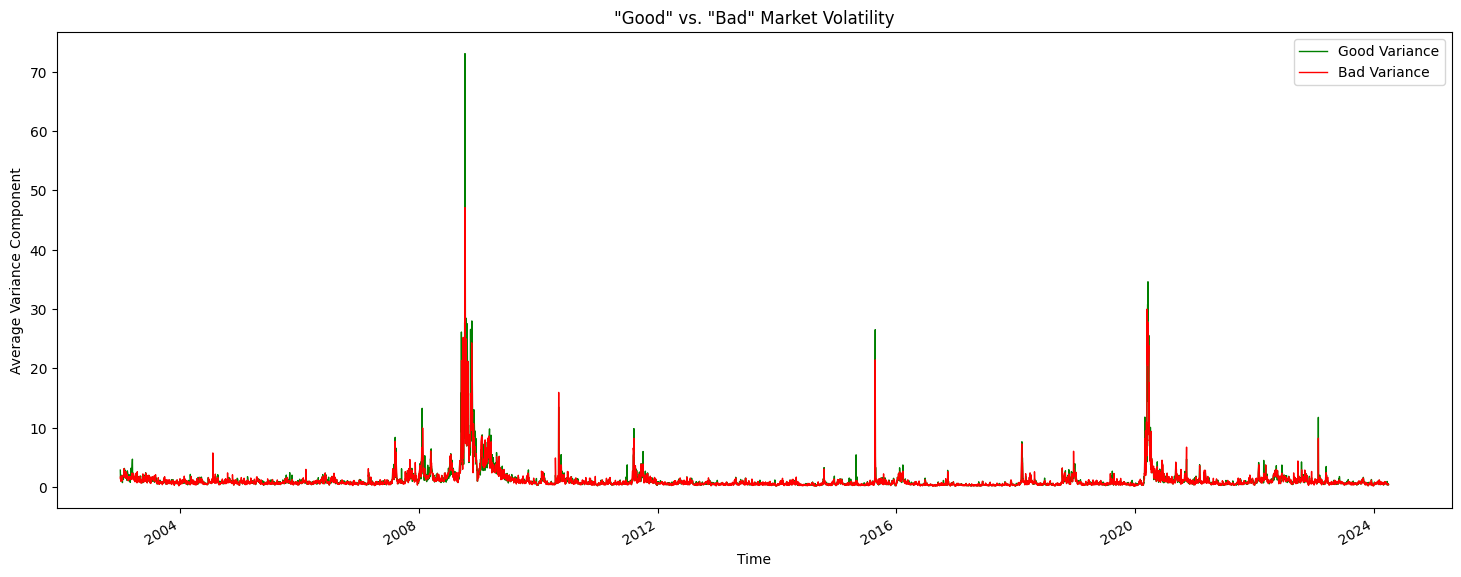

In [ ]:
plt.figure(figsize=(18, 7))
df_market['rv'].plot(title='Market-Wide Realized Volatility Over Time', color='navy', linewidth=1)
plt.axvspan('2007-12-01', '2009-06-30', color='red', alpha=0.2, label='2008 Financial Crisis')
plt.axvspan('2020-02-20', '2020-04-07', color='orange', alpha=0.2, label='COVID-19 Crash')
plt.xlabel('Time')
plt.ylabel('Average Realized Variance')
plt.legend()
plt.show()

plt.figure(figsize=(18, 7))
df_market['good'].plot(label='Good Variance', color='green', linewidth=1)
df_market['bad'].plot(label='Bad Variance', color='red', linewidth=1)
plt.title('"Good" vs. "Bad" Market Volatility')
plt.xlabel('Time')
plt.ylabel('Average Variance Component')
plt.legend()
plt.show()